In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
bert_1 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_h_bert_ds6_fold1_results.csv')
bert_2 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_h_bert_ds5_fold2_results.csv')
bert_3 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_h_bert_ds4_fold3_results_v2.csv')
bert_4 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_h_bert_ds3_fold4_results.csv')
bert_5 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_h_bert_ds2_fold5_results.csv')
bert_6 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/hansen_h_bert_ds1_fold6_results.csv')
bert = pd.concat((bert_1, bert_2, bert_3, bert_4, bert_5, bert_6), axis=0)
#bert = bert.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(bert['exp'], bert['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(bert['exp'], bert['predict'])))

# R^2 Coefficient of Determination
print(r2_score(bert['exp'], bert['predict']))

1.7869909077599324
2.733153582586599
0.7203204728992932


In [4]:
len(bert)

1183

In [5]:
bert['residual']= bert['predict']-bert['exp']

In [6]:
# calculate standard deviation of the residuals (sdr) - sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((bert['residual']**2).sum()/(len(bert)-2))
sdr

2.735466874225923

In [7]:
bert['std_residual'] = bert['residual']/sdr
bert['std_residual']

0     -2.146044
1     -0.241327
2     -0.476429
3     -0.210090
4      0.099547
         ...   
193   -0.381934
194   -0.490282
195   -2.477097
196    0.131840
197   -0.072766
Name: std_residual, Length: 1183, dtype: float64

In [8]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
bert_outliers = bert.loc[abs(bert['std_residual']) > n]
bert_outliers

,Unnamed: 0,smiles,exp,predict,residual,std_residual
19,19,C[P](F)(F)=O,8.4,-0.878434,-9.278434,-3.391901
78,78,OC=O,14.0,22.777193,8.777193,3.208664
175,175,C#N,9.0,0.383659,-8.616341,-3.149861
5,5,COO,30.0,16.617900,-13.382100,-4.892072
58,58,C1N2CN3CN1CN(C2)C3,16.0,5.430055,-10.569945,-3.864037
81,81,CN[C@@H](C)[C@H](O)c1ccccc1,24.1,12.272053,-11.827947,-4.323923
102,102,OC(=O)c1[nH]c2cc(O)c(O)cc2c1,10.6,19.588863,8.988863,3.286043
195,195,CC(N)=S,20.2,11.149739,-9.050261,-3.308489
3,3,CC(O)=S,8.9,17.878136,8.978136,3.282122
6,6,CC1=CN([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)C(=O)...,32.8,16.532550,-16.267450,-5.946864


In [9]:
# Set the default text font size
plt.rc('font', size=22)

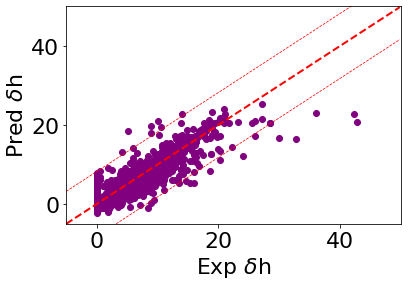

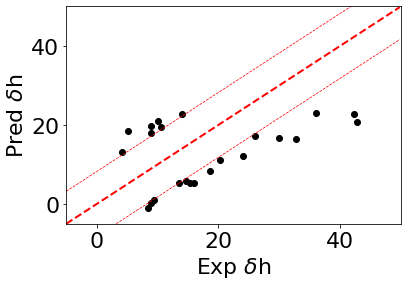

In [10]:
plt.figure(2)

ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert['exp'], y=bert['predict'], color='purple')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert_outliers['exp'], y=bert_outliers['predict'], color='black')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

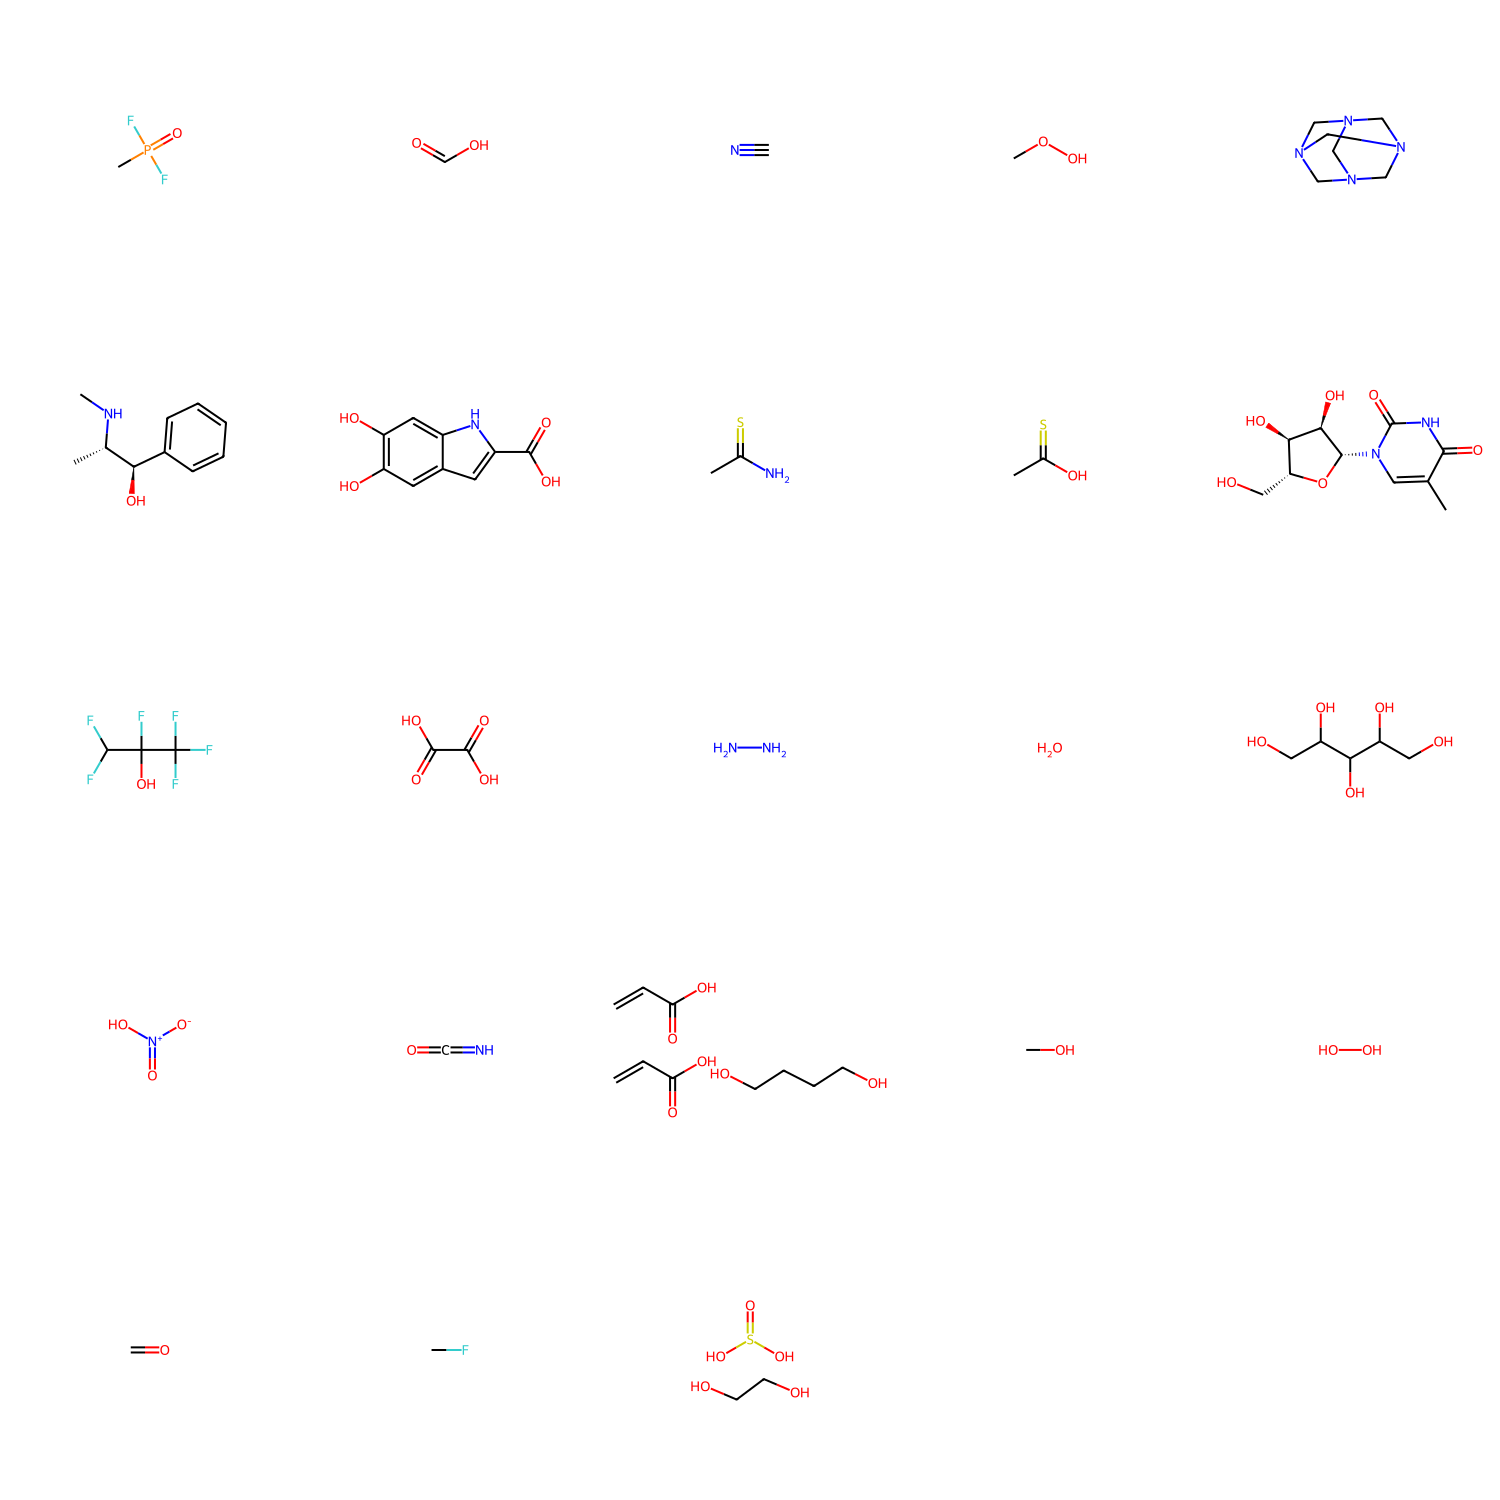

In [11]:
outliners = [Chem.MolFromSmiles(x) for x in bert_outliers['smiles']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [12]:
bert_outliers.to_csv('bert2_h_outliers.csv')

In [13]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
bert_outliers2 = bert.loc[abs(bert['std_residual']) > n]
bert_outliers2

,Unnamed: 0,smiles,exp,predict,residual,std_residual
0,0,SC#N,10.9,5.029569,-5.870431,-2.146044
19,19,C[P](F)(F)=O,8.4,-0.878434,-9.278434,-3.391901
70,70,CC=NO,20.2,13.505288,-6.694712,-2.447375
78,78,OC=O,14.0,22.777193,8.777193,3.208664
121,121,N,18.8,12.654545,-6.145455,-2.246584
...,...,...,...,...,...,...
61,61,CC(=O)Nc1ccc(O)cc1,13.9,20.411549,6.511549,2.380416
65,65,OC(=O)CS,20.0,13.867423,-6.132577,-2.241876
119,119,C1C=Cc2ccccc12,9.0,3.121525,-5.878475,-2.148984
175,175,OCCOCCOCCOC=C,6.6,13.030194,6.430194,2.350675


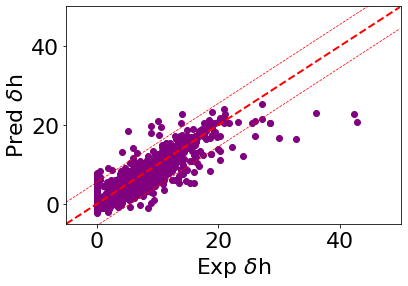

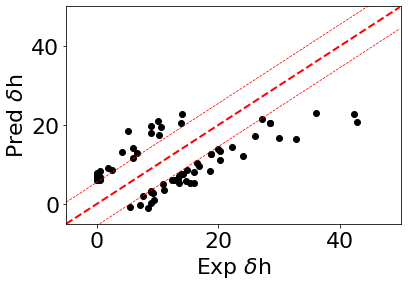

In [14]:
plt.figure(2)

ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert['exp'], y=bert['predict'], color='purple')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert_outliers2['exp'], y=bert_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

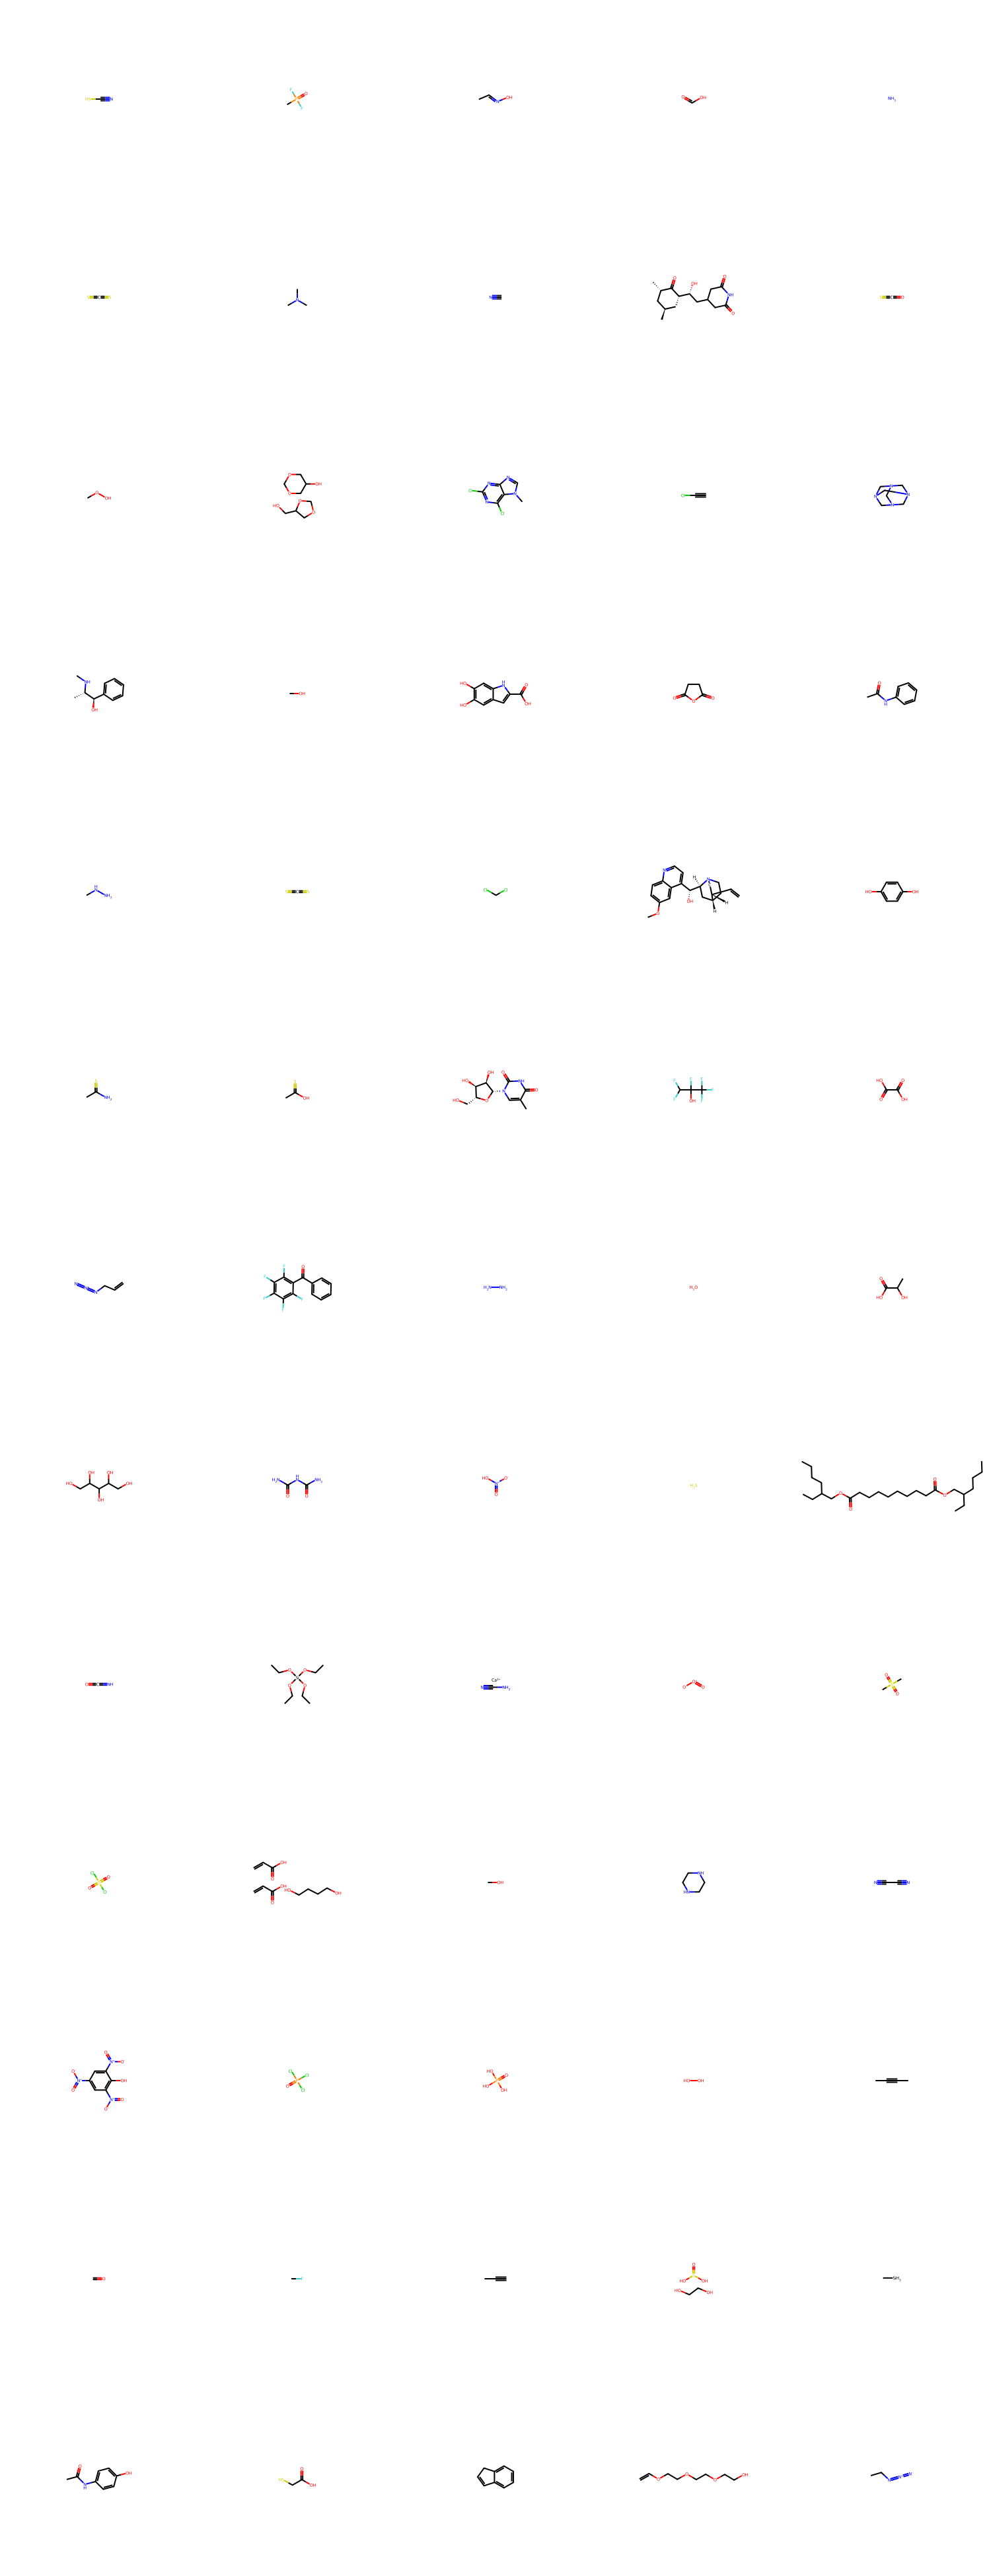

In [15]:
outliners2 = [Chem.MolFromSmiles(x) for x in bert_outliers2['smiles']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [19]:
bert_outliers2.to_csv('bert2_h_outliers2.csv')

In [20]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in bert_outliers2['smiles']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
109.67717556415661


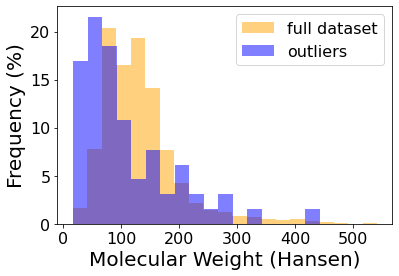

In [21]:
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])
ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()